In [2]:
import pandas as pd
import networkx as nx

## Loading Twitter data

In [3]:
mydata = pd.read_excel("Twitter_data.xlsx", index_col=0)
mydata

id            author_id                created_at  \
0   1477769524011315210   826104766161879044  2022-01-02T22:31:24.000Z   
1   1477750903025319937  1433581386112380932  2022-01-02T21:17:25.000Z   
2   1477743788793778179           1273894620  2022-01-02T20:49:09.000Z   
3   1477740238323789831             19198704  2022-01-02T20:35:02.000Z   
4   1477737600479866884   948674925950328833  2022-01-02T20:24:33.000Z   
..                  ...                  ...                       ...   
81  1477119968584126464             18586040  2022-01-01T03:30:18.000Z   
82  1477100493830864903            436045478  2022-01-01T02:12:55.000Z   
83  1477098881880055814  1049005198860009473  2022-01-01T02:06:31.000Z   
84  1477095571777155073              9745402  2022-01-01T01:53:22.000Z   
85  1477087462564540422            539649365  2022-01-01T01:21:08.000Z   

                                                 text  retweet_count  \
0   @Iovehearts is it a pension scheme with your e...              0   
1   @AccidentAlert_K @sikikasafety @road_driving @...              1   
2   RT @PRSA_Roadsafety: Let be honest PSV drivers...              4   
3   You’ve heard of the “Great Resignation,” but a...              0   
4   @AccidentAlert_K @sikikasafety @road_driving @...              1   
..                                                ...            ...   
81  [USA] Public Relations Sr. Advisor for Infrast...              0   
82  RT @DWJr16: It has been my honor to serve as 2...              1   
83  It has been my honor to serve as 2021 @PRSAHea...              1   
84  RT @PRSA: As we close out 2021, we want to tak...              5   
85  🚨Remember to buy your tickets for our Raffle! ...              0   

    reply_count  like_count  quote_count         username  follower_count  \
0             1           0            0     _postpunkdad             674   
1             0           5            0    Missy41091460               3   
2             0           0            0          kiela_w             921   
3             0           2            0   PRSASacramento            2405   
4             0           5            0   EliasZakayo300             400   
..          ...         ...          ...              ...             ...   
81            0           0            0          pr_jobs            5833   
82            0           0            0       PRSAHealth            2293   
83            0           4            0           DWJr16             146   
84            0           0            0       alaskaegan             498   
85            0           1            0  UMDearbornPRSSA             665   

    following_count  
0               414  
1                29  
2               782  
3              1522  
4              1640  
..              ...  
81             3295  
82             1582  
83             1135  
84              437  
85              687  

[86 rows x 11 columns]

## Network by Mentions 

In [4]:
mention_list = mydata.text.str.extractall(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)")
mention_list = mention_list.reset_index().rename(columns = {"level_0": "index1", 
                                                            "match": "index2",
                                                            0: "mentioned"})
mention_df = mention_list.merge(mydata['username'], left_on="index1", right_index=True)
mention_df = mention_df.rename(columns = {"username": "from", 
                                          "mentioned": "to"})
mention_df = mention_df[["from", "to"]]
mention_df

from               to
0     _postpunkdad       Iovehearts
1    Missy41091460  AccidentAlert_K
2    Missy41091460     sikikasafety
3    Missy41091460     road_driving
4    Missy41091460       ntsa_kenya
..             ...              ...
158     PRSAHealth         LinkedIn
159         DWJr16       PRSAHealth
160         DWJr16             PRSA
161         DWJr16         LinkedIn
162     alaskaegan             PRSA

[163 rows x 2 columns]

## Network Object Generator

In [5]:
G = nx.from_pandas_edgelist(mention_df, source = "from", target = "to")

### Examining elements of a graph object

For brief tutorial of NetworkX in Python, see at https://networkx.org/documentation/stable/tutorial.html

In [14]:
list(G.nodes) # node list
list(G.edges) # edge list

[('_postpunkdad', 'Iovehearts'),
 ('Missy41091460', 'AccidentAlert_K'),
 ('Missy41091460', 'sikikasafety'),
 ('Missy41091460', 'road_driving'),
 ('Missy41091460', 'ntsa_kenya'),
 ('Missy41091460', 'TIPSIKenya'),
 ('Missy41091460', 'PRSA_Roadsafety'),
 ('Missy41091460', 'motoristsoffice'),
 ('Missy41091460', 'NyanzaTraffic'),
 ('Missy41091460', 'NorthernCoridor'),
 ('Missy41091460', 'KTA_Kenya'),
 ('AccidentAlert_K', 'EliasZakayo300'),
 ('AccidentAlert_K', 'papafavour'),
 ('AccidentAlert_K', 'kipepeo75'),
 ('AccidentAlert_K', 'othigomartin'),
 ('AccidentAlert_K', 'lepolos1'),
 ('AccidentAlert_K', 'PRSA_Roadsafety'),
 ('AccidentAlert_K', 'ValentineMwamb3'),
 ('AccidentAlert_K', 'alex_ngaira'),
 ('AccidentAlert_K', 'mgmulama'),
 ('sikikasafety', 'EliasZakayo300'),
 ('sikikasafety', 'papafavour'),
 ('sikikasafety', 'kipepeo75'),
 ('sikikasafety', 'ValentineMwamb3'),
 ('sikikasafety', 'alex_ngaira'),
 ('sikikasafety', 'right_ke'),
 ('sikikasafety', 'mgmulama'),
 ('road_driving', 'EliasZakay

## Visualization

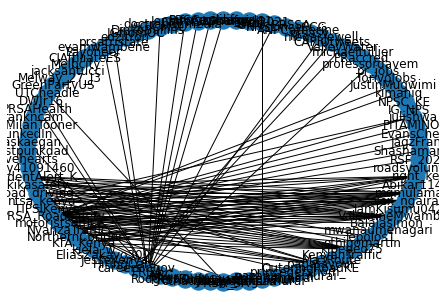

In [6]:
nx.draw_shell(G, with_labels=True)

## Gephi

In [7]:
Gephi_df = mention_df.groupby(['from', 'to']).size().to_frame().reset_index().rename(columns=
                                                                                     {"from": "source",
                                                                                     "to": "target",
                                                                                     0:"n"})
Gephi_df.to_excel("Gephi_df.xlsx")
Gephi_df

source           target  n
0       ANPCatherine      NHSLincsCCG  1
1          Abikar114  PRSA_Roadsafety  1
2    AccidentAlert_K  PRSA_Roadsafety  1
3        Balalasimon  PRSA_Roadsafety  1
4             CMPRSA             PRSA  1
..               ...              ... ..
149         tankncam   TheMilanTooner  1
150         ufgirl81         prsa_pag  1
151       usakenshin     Prsa_samurai  2
152       usakenshin         Sedi2021  1
153       usakenshin  nazanin_samurai  1

[154 rows x 3 columns]

## Centrality

### Degree centrality

In [51]:
degree_centrality = pd.DataFrame.from_dict(deg_centrality, orient='index').rename({0: "degree_centarlity"}, axis = 1)
degree_centrality

degree_centarlity
_postpunkdad              0.010526
Iovehearts                0.010526
Missy41091460             0.105263
AccidentAlert_K           0.105263
sikikasafety              0.084211
...                            ...
PRSAHealth                0.052632
tankncam                  0.010526
TheMilanTooner            0.010526
LinkedIn                  0.021053
alaskaegan                0.010526

[96 rows x 1 columns]

In [52]:
degree_centrality.sort_values(by=['degree_centarlity'], ascending=False)

degree_centarlity
PRSA_Roadsafety           0.294737
PRSA                      0.178947
mgmulama                  0.115789
ValentineMwamb3           0.115789
alex_ngaira               0.115789
...                            ...
kimaniq                   0.010526
JustinMugwimi             0.010526
TorivoJobs                0.010526
pr_jobs                   0.010526
alaskaegan                0.010526

[96 rows x 1 columns]

### Betweenness centrality

In [53]:
bet_centrality = nx.betweenness_centrality(G)
bet_centrality

{'_postpunkdad': 0.0,
 'Iovehearts': 0.0,
 'Missy41091460': 0.007317540888267135,
 'AccidentAlert_K': 0.006286751968340476,
 'sikikasafety': 0.003005828010607734,
 'road_driving': 0.0010014397696368582,
 'ntsa_kenya': 0.006286994080947048,
 'TIPSIKenya': 0.000425531914893617,
 'PRSA_Roadsafety': 0.14264338343763688,
 'motoristsoffice': 0.003005828010607734,
 'NyanzaTraffic': 0.003005828010607734,
 'NorthernCoridor': 0.000425531914893617,
 'KTA_Kenya': 0.003005828010607734,
 'kiela_w': 0.0,
 'EliasZakayo300': 0.007317540888267135,
 'JesseKenya': 0.0,
 'HiringCare': 0.0,
 'careersingov': 0.022844344904815232,
 'PRSA': 0.07995520716685331,
 'IABC': 0.0,
 'Mwirigi': 0.0,
 'RodgersRuthugua': 0.0,
 'PRSAGoldCoast': 0.0,
 'othatnikkiyoung': 0.0,
 'PRSA_SA': 0.006047032474804032,
 'JazzyMatharu': 0.0,
 'Okami_mxsamurai': 0.00011198208286674133,
 'usakenshin': 0.0007838745800671893,
 'Prsa_samurai': 0.0,
 'nazanin_samurai': 0.0,
 'princegershom_': 0.0,
 'OuteringRoadKE': 0.0,
 'papafavour': 0.0

## Gephi

In [56]:
Gephi_df = mention_df.groupby(['from', 'to']).size().to_frame().reset_index().rename(columns=
                                                                                     {"from": "source",
                                                                                     "to": "target",
                                                                                     0:"n"})
Gephi_df

source           target  n
0       ANPCatherine      NHSLincsCCG  1
1          Abikar114  PRSA_Roadsafety  1
2    AccidentAlert_K  PRSA_Roadsafety  1
3        Balalasimon  PRSA_Roadsafety  1
4             CMPRSA             PRSA  1
..               ...              ... ..
149         tankncam   TheMilanTooner  1
150         ufgirl81         prsa_pag  1
151       usakenshin     Prsa_samurai  2
152       usakenshin         Sedi2021  1
153       usakenshin  nazanin_samurai  1

[154 rows x 3 columns]

### Loading the file on Gephi
On Gephi, file -> import spreadsheet -> open excel file (Gephi_df.xlsx) -> import as "Edges table" in general excel options -> finish -> ok